# Data Science in Action Bonus Project

Simone Lu 748921, Enrico Romano 753321

 # 1. Introduction 
Our project concerns the prediction of whether a person had sleep problems according to the answers we collected through the questionnaire. The prediction is done through the k-nearest neighbours (KNN)  

We believe that this is an important topic to address because Covid-19 has radically changed our lifestyles, particularly that of students and workers. Just try to think about how many hours we spend in front of our screens and how much anxiety and uncertainty this pandemic has generated in us, these are all factors that can then lead to difficulty in falling asleep, concentration and many others. 

## 2. Methods  

### Data collection: 
the project started with the administration of a questionnaire on Google forms concerning the use of mobile phones, focusing more on the habits and the time spent on the screen of everyone.  
Then it was supplemented with answers from other questionnaires that we managed to receive from our colleagues on the course.  


### Discussion/features: 
Sessions were then carried out to understand which variables to take from the questionnaire and decide on which issues to implement our algorithm. To predict whether a person has had problems falling asleep recently, we used three variables:  

1. Phone daily usage (expressed in units of time) 

2. Study daily hours (expressed in units of time) 

3. Stress level (from a scale of 1 to 7). 


### Feature engineering: 
Before starting to implement the algorithm to our dataset, we proceeded as the data science process dictates with feature work.  
We transformed the variable "sleeping difficulty" via the "one hot encoding" method into 1 if a person had problems recently 0 otherwise. Then for the independent variables, we brought them on the same scale since the KNN chooses the k closest to the neighbours and then based on that, it assigns the class or predicts a value.  

 
### Algorithm:  
Among the most plausible algorithms for our classification problem are logistic regression and knn. The reasons why we chose knn: 
First, we have a small dataset of 30 data points. 
Second, we have appropriately labelled data because we are predicting someone is having sleeping disorder or not, the outcome can be 1 or 0.  
Finally, we choose knn because it is a non-parametric method, and it is suitable when we are considering the order of something, where even if the numerical data change, but the outcome may remain the same. 

### Model training: 

Before proceeding to model training, we performed the data split, 25% as test data. This process is necessary to test the performance of the model we are going to implement.  
Then as a performance metric we chose k = 5 following the elbow method, which is one of the most popular methods of determining the optimal value of k.

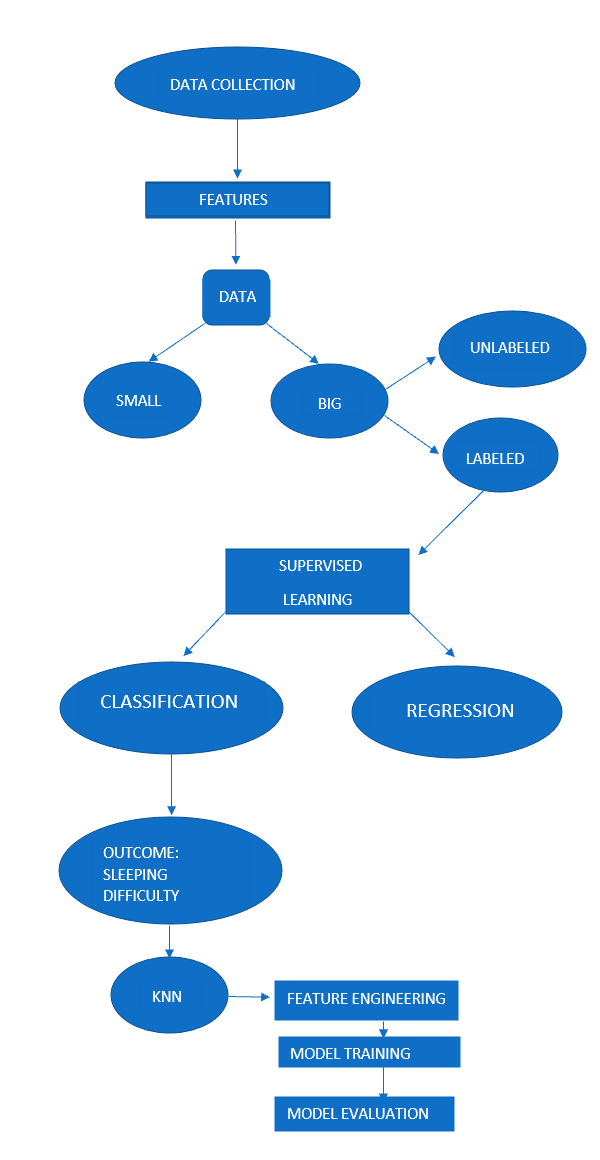
  
 
  



# K Nearest Neighbors with Python
We start our project by importing the necessary libraries. Namely numpy, matplotlib, pandas and seaborn. 


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
#this is a function that allows us to save the graphs that we are going to plot within the notebook


# Load the data 

we have dropped column number 0, inside which contains irrelevant information for our study. 

In [5]:
df = pd.read_csv("Smartphone Usage Survey.csv")

In [6]:
df=df.drop(df.columns[0],axis=1)

# One hot encoded data 

We used one hot encoding method in order to transform the sleeping difficulty problems column into numerical form:
- 1 if a person had sleeping diffulty problem in the past weeks.
- 0 if not. 


In [7]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['sleeping_difficulty '])
one_hot_encoded_data.head()

,gender,operating_system,daily_phone_usage,if_matches,social_media,emailing,games,shopping,food_delivery,phone_calls,...,entertainment,other,When do you mostly use the phone?,How often do you change your mobile phone?,Do you sleep next to your smarthphone?,Do you think you are addicted to the phone?,study_time,stress_level,sleeping_difficulty _no,sleeping_difficulty _yes
0,Female,iOS,3.5,"Yes, it matches",3.5,0.25,0.25,0.25,0.25,0.75,...,0.25,0.25,Before bed,Around 3 years,"Yes, I put it on the bedside table before goin...","No, but maybe I am unconscious about it.",3,1,0,1
1,Male,Android,4.5,"Yes, it matches",2.5,0.25,0.25,0.75,0.25,0.25,...,0.75,0.25,Afternoon,I feel the necessity to change even though it ...,"Yes, I put it on the bedside table before goin...","Yes, I try to use less but it is hard.",5,4,1,0
2,Male,iOS,5.0,"Yes, it matches",3.5,0.75,0.25,0.75,0.25,0.75,...,1.50,0.25,Before bed,More than 4 years,"Yes, I put it on the bedside table before goin...","Yes, I try to use less but it is hard.",4,3,1,0
3,Female,iOS,3.5,"Yes, it matches",1.5,0.25,0.25,0.75,0.25,0.75,...,1.50,0.25,Before bed,I changed it only when it breaks down.,"Yes, I put it on the bedside table before goin...","No, but maybe I am unconscious about it.",5,7,1,0
4,Male,iOS,5.0,"Yes, it matches",3.5,0.25,0.25,0.75,0.25,0.25,...,0.25,0.25,Morning,I feel the necessity to change even though it ...,"Yes, I put it on the bedside table before goin...","Yes, I try to use less but it is hard.",3,7,1,0


In [9]:
y = one_hot_encoded_data.iloc[:, -1].values #y=sleeping_difficulty _yes
print(y)

[1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0]


# Standardise the variables - feature scaling 

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [12]:
x=df.iloc[:,[2,-1,-2]].values 
print(x)
#daily usage, study hours and stress level

[[3.5 1.  3. ]
 [4.5 4.  5. ]
 [5.  3.  4. ]
 [3.5 7.  5. ]
 [5.  7.  3. ]
 [2.5 5.  5. ]
 [5.  4.  5. ]
 [3.5 5.  5. ]
 [3.5 5.  5. ]
 [5.  6.  5. ]
 [2.5 6.  3. ]
 [3.5 7.  3. ]
 [5.  6.  5. ]
 [4.5 5.  2. ]
 [3.5 4.  4. ]
 [5.  3.  3. ]
 [1.5 4.  2. ]
 [3.5 5.  3. ]
 [4.5 7.  3. ]
 [4.5 5.  4. ]
 [4.5 5.  5. ]
 [3.5 7.  4. ]
 [5.  2.  4. ]
 [5.  4.  4. ]
 [5.  3.  3. ]
 [3.5 3.  1. ]
 [5.  3.  5. ]
 [3.5 5.  5. ]
 [5.  4.  4. ]
 [4.5 7.  3. ]]


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [15]:
scaled_features = scaler.transform(x)

After we scaled the features, we identified the columns with the variable's name.

In [18]:
df_feat = pd.DataFrame(scaled_features)
df_feat.columns =['daily usage', 'study hours','stress level']
print(df_feat)

    daily usage  study hours  stress level
0     -0.670955    -2.347642     -0.758971
1      0.417080    -0.461144      1.062559
2      0.961098    -1.089977      0.151794
3     -0.670955     1.425354      1.062559
4      0.961098     1.425354     -0.758971
5     -1.758991     0.167689      1.062559
6      0.961098    -0.461144      1.062559
7     -0.670955     0.167689      1.062559
8     -0.670955     0.167689      1.062559
9      0.961098     0.796521      1.062559
10    -1.758991     0.796521     -0.758971
11    -0.670955     1.425354     -0.758971
12     0.961098     0.796521      1.062559
13     0.417080     0.167689     -1.669736
14    -0.670955    -0.461144      0.151794
15     0.961098    -1.089977     -0.758971
16    -2.847026    -0.461144     -1.669736
17    -0.670955     0.167689     -0.758971
18     0.417080     1.425354     -0.758971
19     0.417080     0.167689      0.151794
20     0.417080     0.167689      1.062559
21    -0.670955     1.425354      0.151794
22     0.96

# Data split

The train-test split is a technique for evaluating the performance of a machine learning algorithm. It can be used for classification or regression problems and can be used for any supervised learning algorithm.
It is essential to implement it because it allow us to compare the performance of the algorithms for your predictive modeling problem.
We used the sklearn library to perform it. 

In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feat, y, test_size = 0.25, random_state = 0)

# Using KNN
We used a KNN technique called the elbow method, which consists of determining the optimal value of K based on the error rate value closest to 0, but not equal to 0. 


In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
error_rate = []

for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

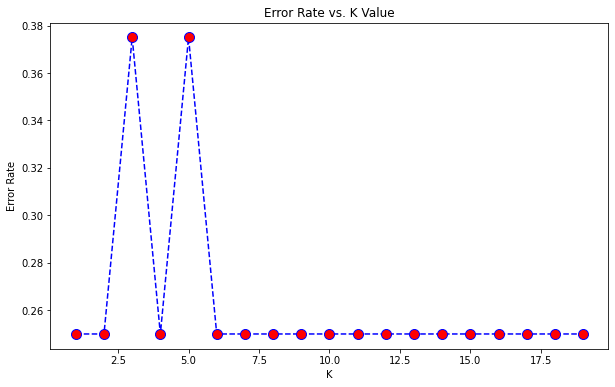

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We used a KNN technique called the elbow method, which consists of determining the optimal value of K based on the error rate value closest to 0, but not equal to 0. 

After that, we constructed the classifier with the value of k found, and with this classifier we obtained our predictions

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
y_pred = knn.predict(X_test)
print(y_pred)

[0 0 0 1 0 0 0 0]


To test the validity of our predictions, we constructed a confusion matrix and classification report, so that we could calculate the accuracy of our model. 

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[5 1]
 [2 0]]


              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.00      0.00      0.00         2

    accuracy                           0.62         8
   macro avg       0.36      0.42      0.38         8
weighted avg       0.54      0.62      0.58         8



Finally, we plotted the actual and predicted values to make a comparison between them. 

C:\Users\39392\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\39392\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


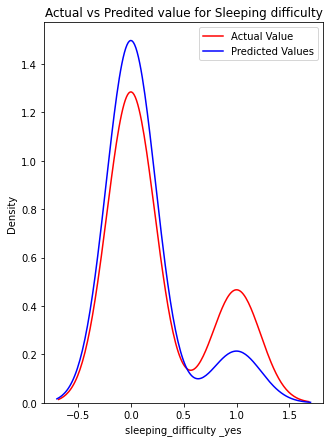

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 7))
ax = sns.distplot(one_hot_encoded_data['sleeping_difficulty _yes'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Predited value for Sleeping difficulty')
plt.legend()
plt.show()
plt.close()


# 4. Experimental design
K Nearest Neighbor is one of the most important algorithms in machine learning. Machine learning models use a set of input values to predict output values. In addition, KNN is one of the simplest machine learning algorithms used primarily for classification. It classifies the data point on how its neighbour is classified. KNN classifies new data points based on the similarity measure of previously stored data points. Since the dataset has labelled data, theory recommends proceeding with supervised methods. Since our goal is to predict a category, we decided to proceed with KNN, that is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems. 

A classification problem has a discrete value as its output, in our case study, “sleeping difficulty yes” and “sleeping difficulty no” are discrete. The main purpose of our analysis is to try to predict whether someone may have sleep problems (1) or not (2) based on phone usage time, stress level and study time. 

We have built the classifier and then calculated the predictions. For the evaluation of our model, we used two metrics:  

1. Confusion matrix: that is a technique for summarizing the performance of a classification algorithm. Calculating a confusion matrix can give you a better idea of what your classification model is getting right and what types of errors it is making. 

2. Accuracy: Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition: 

 
Accuracy= Number of correct predictions / 
          Total number of predictions



# 5.Results

Through the evaluation of our model, we can see that it can be considered a good model for the prediction of sleeping difficulties. In fact, the graph in the figure shows that the predicted values do not deviate much from the real trend, even if the predicted values cause an overestimation of the 0 value and a much more evident underestimation of 1 (i.e., yes). One of the possible solutions would be to improve the accuracy of our model by choosing a K value with a lower error rate, however, due to the low number of responses obtained, increasing the k value would lead to an overfitting situation (i.e., a concept in data science, which occurs when a statistical model fits exactly against its training data). 

Nevertheless, it can be said that our model shows that few people have sleep difficulties. 

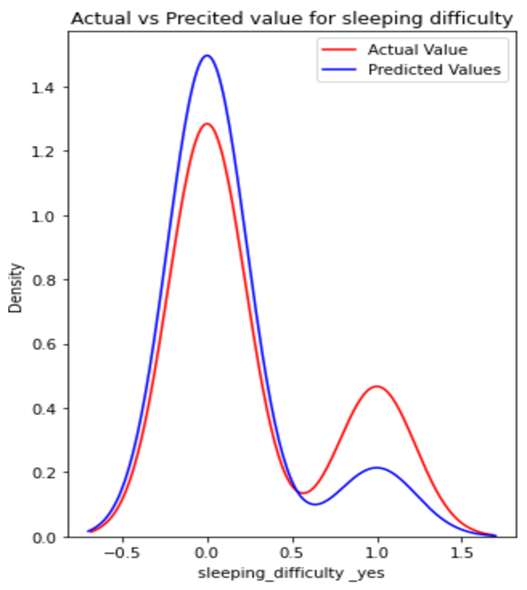



# Conclusion

Young people's difficulties in sleeping do not seem to be strictly related to the mobile phone, study or stress. Of course, the limited data at our disposal does not allow us to draw very reliable conclusions; a larger sample size would be necessary. However, through the KNN method we can have a reliable prediction for our case study. 

As explained in the previous paragraphs, the model was built from the administration of a questionnaire to the students and then, in a data cleaning phase, the dataset used for our model was created. After defining the y and the x, we split the data into training and test sets and then created the KNN classifier with the consequent choice of the best K value (also supported by a graphical observation). In a next step, the model prediction was carried out and with the construction of the confusion matrix the accuracy of our test was calculated. Finally, with a graph also shown in the previous paragraph, we were able to compare the actual values with the predicted ones. 

An interesting point for reflection would be to extend the analysis to all age groups and not only focus on university students; in particular, again with reference to the use of mobile phones, it could be interesting to check that this does not have any negative effects on children's sleep, or the effects of stress and electronic devices on adult workers. 